# Môn: Xử lý và phân tích hình ảnh 
### Họ và tên: Phan Văn Hiếu 
### Mã SV: 22022527
### Link code: https://github.com/phanhieeus/Midterm_submit-.git

# Import thư viện

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Finding
Cắt ảnh từ đề bài, lưu theo tên và load như bên dưới.

In [36]:
items = ["balloon", "bear", "boat", "bowtie", "cake", "car", "duck", "grape", "icecream", "pegasus", "rabbit", "strawberry","tennis", "train", "melon"]
path_img_full = "data/Finding/1/1_full.jpg"
path_items = [f"data/Finding/1/1_{item}.jpg" for item in items]

In ảnh

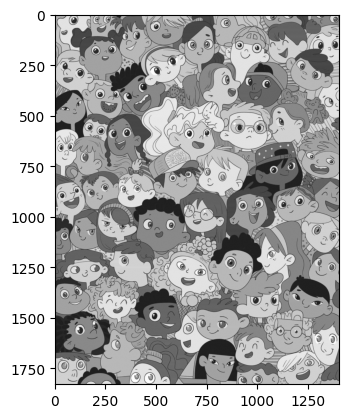

In [37]:
# In ra ảnh full dưới dạng ảnh xám
img_full = cv2.imread(path_img_full,0)
plt.imshow(img_full, cmap="gray")


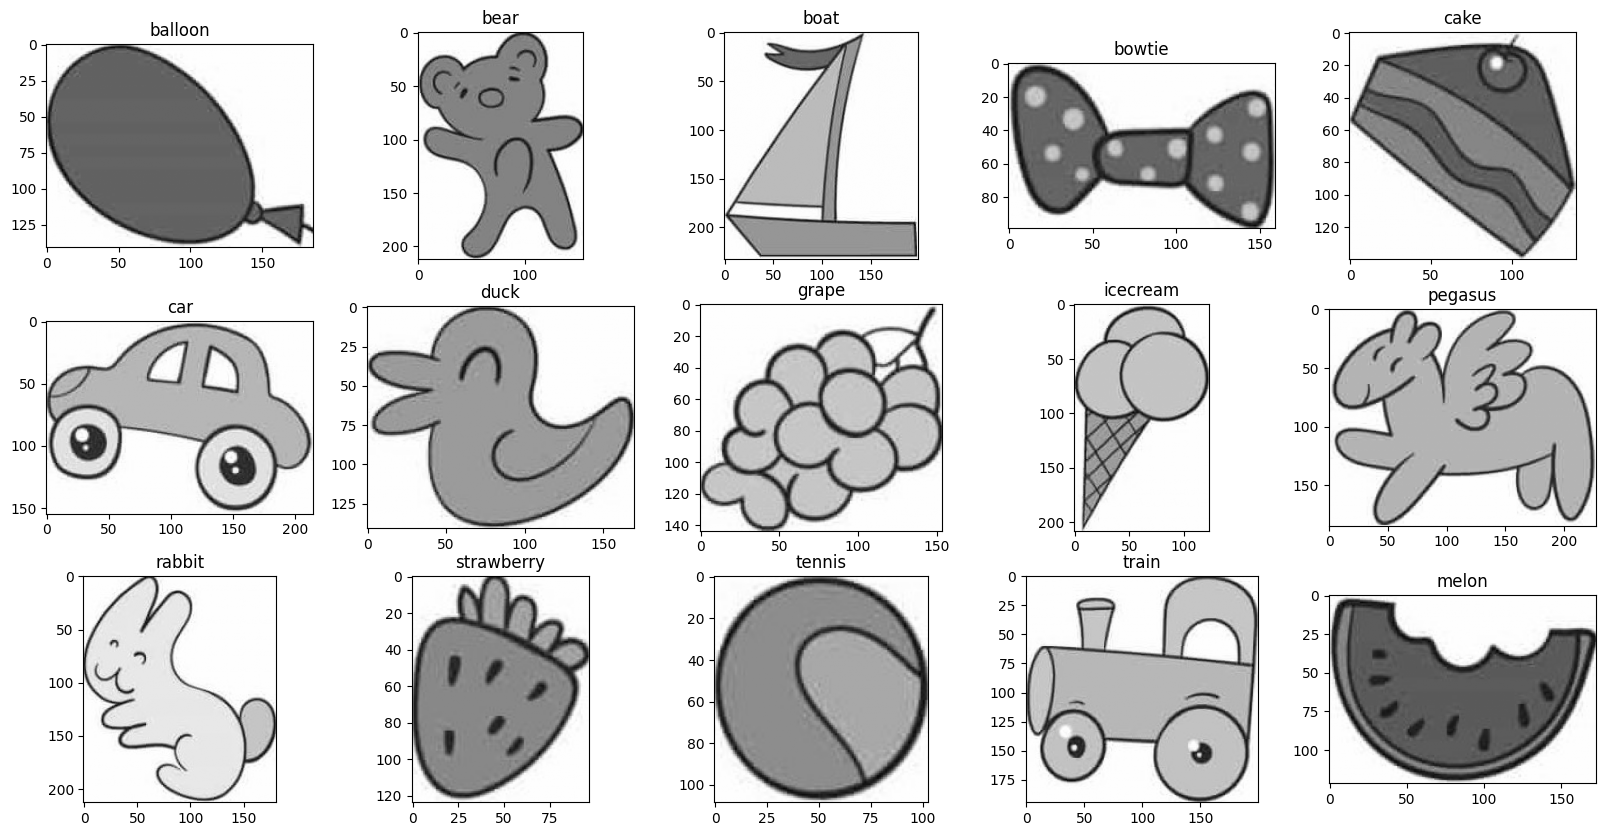

In [38]:
fig, axis = plt.subplots(3,5, figsize=(20,10))
axis = axis.flatten()
for i, path_item in enumerate(path_items):
    img = cv2.imread(path_item, 0)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axis[i].imshow(img, cmap="gray")
    axis[i].set_title(items[i])
plt.show()


**Sử dụng Template Maching OpenCV.**
 - Trong OpenCV:
    + TM_CCOEFF_NORMED (Hệ số tương quan chuẩn hóa): Đo độ tương quan giữa mẫu và vùng hình ảnh -> chọn max.
    + TM_SQDIFF_NORMED (Hiệu bình phương chuẩn hóa): Đo độ khác biệt giữa mẫu và vùng hình ảnh -> chọn min. 
    
**Trong bài toán này sử dụng TM_CCOEFF_NORMED**

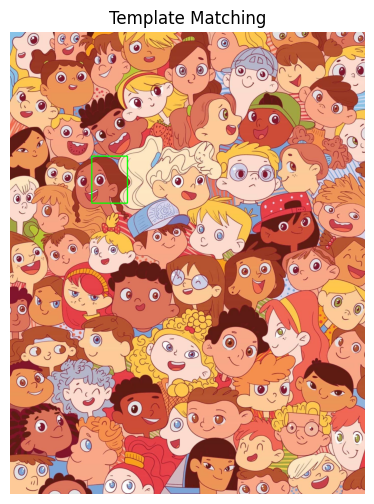

In [39]:
img = cv2.imread(path_items[0], 0)
w, h = img.shape[::1]
output = cv2.imread(path_img_full)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

result = cv2.matchTemplate(img_full, img, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc  # Điểm góc trên bên trái
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), thickness=4)

plt.figure(figsize=(8, 6))
plt.imshow(output, cmap='gray')
plt.title('Template Matching')
plt.axis('off') 
plt.show()


**Không tìm thấy object, có thể do:**
 - Khác kích thước: object trên template được cắt ra khác kích thước với trên full_image -> Thay đổi kích thước phù hợp.
 - Object ở template có nền trắng, trên full_image bị nhiễu do chèn cả các object khác -> Thêm mask để loại nền.

**Cài đặt:**
 - Sử dụng scales để tạo ra một mảng có thể thay đổi kích thước của các template
 - Tham số threshold ngưỡng đo của phép template matching. Nếu kết quả dưới ngưỡng threshold, trong bức ảnh không có vật phẩm cần tìm hoặc thuật toán không tìm ra được hình ảnh.
 - mask_value: giá trị này sử dụng để loại bỏ nền của template. (nền của template là màu trắng hoặc gần trắng.)


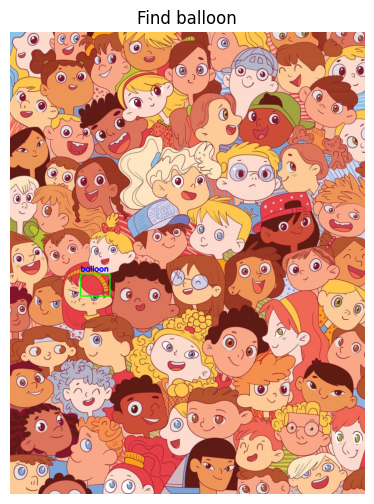

In [40]:
method = cv2.TM_CCORR_NORMED
scales = np.linspace(0.4, 1.0, 20)
threshold = 0.6
mask_value = 240

#Thay đổi cỡ của template và loại bỏ những phần không quan trọng bằng mask
img = cv2.imread(path_items[0], 0)
output = cv2.imread(path_img_full)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
best_match = None
best_val = -1
template_mask = np.where(img < mask_value, 1, 0).astype(np.uint8)

for scale in scales:
    img_resize = cv2.resize(img, (0,0), fx=scale, fy=scale)
    resize_mask = cv2.resize(template_mask,  (0,0), fx=scale, fy=scale)
    
    w, h = img_resize.shape[::-1]
    result = cv2.matchTemplate(img_full, img_resize, method=cv2.TM_CCORR_NORMED, mask=resize_mask)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if max_val > best_val:
        best_val = max_val
        best_match = (*max_loc, w, h)
if best_match and best_val > 0.8:
    top_left, (w, h) = best_match[:2], best_match[2:]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), thickness=4)
    cv2.putText(output, items[0], (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255), thickness=3)
    plt.figure(figsize=(8, 6))
    plt.imshow(output)
    plt.title(f'Find {items[0]}')
    plt.axis('off') 
    plt.show()

else:
    print(f"A {items[0]} wasn't found")

    

- **Đầu vào:**  
  - Ảnh gốc (`img_full` - BGR).  
  - Danh sách đường dẫn và nhãn của các template (`path_templates`, `templates`).  
  - Các tỷ lệ scale (`scales`) để điều chỉnh kích thước.  
  - Ngưỡng (`threshold`) để xác định mức độ khớp.  
  - Giá trị mask (`mask_value`) để loại bỏ vùng không mong muốn.  
  - Thông số vẽ bounding box (màu, độ dày).  
  - Phương pháp template matching (`method`).  
  - Cấu hình hiển thị văn bản (màu, kích thước font, độ dày).  
  - Đường dẫn lưu ảnh kết quả (`output_path`).  

- **Đầu ra:**  
  - Danh sách các đối tượng tìm được gồm **tọa độ bounding box (x, y, w, h) và nhãn**.

In [41]:
scales = np.linspace(0.4, 1.0, 20)
threshold = 0.6
mask_value = 240

def find_items(
        img_full: np.ndarray, templates: list, path_templates: list, scales: np.ndarray, threshold=0.6, mask_value=230, output_path="output.jpg",
        method=cv2.TM_CCORR_NORMED, box_color=(0,255,0), text_color=(0,0,255), box_thickness: int = 4, font_scale: float = 2.0, font_thickness: int = 5):
    copy = np.copy(img_full)
    gray_img_full = cv2.cvtColor(img_full, cv2.COLOR_BGR2GRAY)
    all_boxes = []
    for path_template, label in zip(path_templates, templates):
        item = cv2.imread(path_template, 0)
        template_mask = np.where(item < mask_value, 1, 0).astype(np.uint8)

        best_match = None
        best_val = -1

        for scale in scales:
            item_resize = cv2.resize(item, (0,0), fx=scale, fy=scale)
            mask_resize = cv2.resize(template_mask, (0,0), fx=scale, fy=scale)
            
            w, h = item_resize.shape[::-1]
            result = cv2.matchTemplate(gray_img_full, item_resize, method=method, mask=mask_resize)

            _, max_val, _, max_loc = cv2.minMaxLoc(result)

            if max_val > best_val:
                best_val = max_val
                best_match = (*max_loc, w, h)
        if best_val > threshold and best_match:
            all_boxes.append((best_match, label))
            print(f"{label} was found!")
        else:
            print(f"{label} was not found!")
    print(all_boxes)
    # Vẽ kết quả
    for box, label in all_boxes:
        x, y, w, h = box
        cv2.rectangle(copy, (x, y), (x + w, y + h), box_color, thickness=box_thickness)
        cv2.putText(copy, f"{label}", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, fontScale=font_scale, color=text_color, thickness=font_thickness)
    
    # Lưu kết quả
    cv2.imwrite(output_path, copy)

    # Hiển thị kết quả
    copy_rgb = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
    plt.imshow(copy_rgb)
    plt.axis('off')
    plt.show()

    return all_boxes


## Finding 1
Sử dụng hàm tìm toàn bộ 15 vật phẩm đã cho trong bài.

balloon was found!
bear was found!
boat was found!
bowtie was found!
cake was found!
car was found!
duck was found!
grape was found!
icecream was found!
pegasus was found!
rabbit was found!
strawberry was found!
tennis was found!
train was found!
melon was found!
[((279, 957, 116, 88), 'balloon'), ((1233, 409, 96, 132), 'bear'), ((609, 1676, 130, 152), 'boat'), ((362, 755, 74, 46), 'bowtie'), ((1200, 839, 83, 83), 'cake'), ((889, 84, 154, 111), 'car'), ((321, 1522, 122, 101), 'duck'), ((690, 1091, 110, 103), 'grape'), ((620, 1370, 89, 149), 'icecream'), ((196, 1291, 134, 109), 'pegasus'), ((729, 433, 130, 152), 'rabbit'), ((568, 346, 54, 69), 'strawberry'), ((53, 750, 61, 64), 'tennis'), ((1085, 1462, 143, 140), 'train'), ((225, 429, 86, 60), 'melon')]


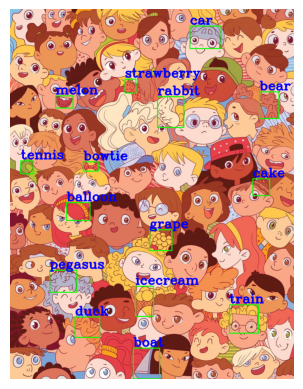

[((279, 957, 116, 88), 'balloon'),
 ((1233, 409, 96, 132), 'bear'),
 ((609, 1676, 130, 152), 'boat'),
 ((362, 755, 74, 46), 'bowtie'),
 ((1200, 839, 83, 83), 'cake'),
 ((889, 84, 154, 111), 'car'),
 ((321, 1522, 122, 101), 'duck'),
 ((690, 1091, 110, 103), 'grape'),
 ((620, 1370, 89, 149), 'icecream'),
 ((196, 1291, 134, 109), 'pegasus'),
 ((729, 433, 130, 152), 'rabbit'),
 ((568, 346, 54, 69), 'strawberry'),
 ((53, 750, 61, 64), 'tennis'),
 ((1085, 1462, 143, 140), 'train'),
 ((225, 429, 86, 60), 'melon')]

In [42]:
items = ["balloon", "bear", "boat", "bowtie", "cake", "car", "duck", "grape", "icecream", "pegasus", "rabbit", "strawberry","tennis", "train", "melon"]
path_img_full = "data/Finding/1/1_full.jpg"
path_items = [f"data/Finding/1/1_{item}.jpg" for item in items]

img_full = cv2.imread(path_img_full)

# print(path_items)
find_items(img_full, items, path_templates=path_items, scales=scales, threshold=threshold, mask_value=mask_value, text_color=(255,0,0))